In [16]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from scipy.signal import find_peaks

In [17]:
#Data  in two columns without headers, separated by comma
exp_spec = genfromtxt('/Users/Ewa 1/Dropbox/Sheet1.csv', delimiter=',',dtype=float)
print(exp_spec)

[[ 3.99212300e+02  8.36399495e-02]
 [ 4.00176600e+02  2.58413040e-02]
 [ 4.01140900e+02  2.04967984e-02]
 ...
 [ 3.99887300e+03 -1.90651210e-02]
 [ 3.99983800e+03 -1.88968018e-02]
 [ 4.00080200e+03  0.00000000e+00]]


In [18]:
wavenumbers=exp_spec[:,0]
heights=exp_spec[:,1]/max(exp_spec[:,1])
H=0.02
T=0.0
D=8
#experimental resolution
res=8.0

In [19]:
#height - minimal height of the peak, threshold - minimal vertical distance between a peak and its neighbor, Distance - minimal distance
peaks, _ = find_peaks(heights,height=H,threshold=T,distance=D)
y=[wavenumbers[j] for j in peaks]

In [20]:
print("Peaks detected of min. height of {}, vertical threshold {} and {}-point distance between neighbors are: ".format(H,T,D))
print(y)
no_of_peaks=len(y)
print("{} peaks fulfilling the criteria in experimental spectrum".format(no_of_peaks))


Peaks detected of min. height of 0.02, vertical threshold 0.0 and 8-point distance between neighbors are: 
[555.4258, 615.2113, 738.6393, 806.1389, 851.4601, 933.424, 978.7452, 986.4595, 1061.673, 1133.995, 1182.208, 1192.816, 1274.78, 1303.708, 1336.494, 1365.422, 1443.529, 1594.921, 1653.742, 2925.629]
20 peaks fulfilling the criteria in experimental spectrum


In [21]:
theo_spec=genfromtxt('68 closed PBE0D3 poszerzone 4cm-1.txt', delimiter='     ',dtype=float)
print(theo_spec)

[[-500.    0.    0.]
 [-499.    0.    0.]
 [-498.    0.    0.]
 ...
 [3497.    0.    0.]
 [3498.    0.    0.]
 [3499.    0.    0.]]


In [22]:
#scaling factor for given functional
SF=0.989
#height - minimal height of the peak, threshold - minimal vertical distance between a peak and its neighbor, Distance - minimal distance
wavenumbers_theo=SF*theo_spec[:,0]
heights_theo=theo_spec[:,1]/max(theo_spec[:,1])
D=8
peaks_theo, _ = find_peaks(heights_theo,height=H,threshold=T,distance=D)
y_theo=[wavenumbers_theo[j] for j in peaks_theo]
print("Theoretical peaks detected of min. height of {}, vertical threshold {} and {}-point distance between neighbors are: ".format(H,T,D))
print(y_theo)
no_of_peaks=len(y_theo)
print("{} peaks fulfilling the criteria in theoretical spectrum".format(no_of_peaks))

Theoretical peaks detected of min. height of 0.02, vertical threshold 0.0 and 8-point distance between neighbors are: 
[326.37, 461.863, 541.972, 558.785, 571.6419999999999, 616.147, 703.179, 785.266, 800.101, 865.375, 888.122, 902.957, 931.638, 944.495, 957.352, 967.242, 1015.703, 1052.296, 1063.175, 1092.845, 1108.669, 1130.427, 1191.745, 1216.47, 1230.316, 1254.052, 1268.887, 1280.7549999999999, 1289.656, 1311.414, 1328.227, 1372.732, 1385.589, 1398.446, 1432.072, 1453.83, 1471.632, 1514.1589999999999, 1575.477, 1590.312, 1649.652, 1671.41, 1699.102, 3027.329, 3043.153, 3123.262, 3167.767, 3197.437, 3213.261]
49 peaks fulfilling the criteria in theoretical spectrum


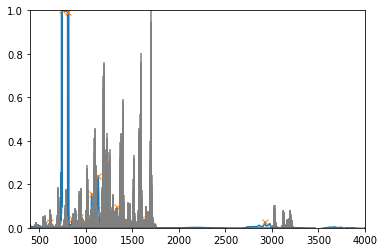

In [23]:
plt.plot(wavenumbers,heights)
plt.ylim(ymin=0,ymax=1)
plt.xlim(xmin=400,xmax=4000)
plt.plot(y,heights[peaks],"x")
#fig, ax = plt.subplots()
plt.stem(wavenumbers_theo, heights_theo,markerfmt=' ',linefmt='grey')
plt.ylim(ymin=0,ymax=1)
plt.xlim(xmin=400,xmax=4000)
plt.show()

In [24]:
#Select theoretical peaks for comparison
#first=np.array([res+1.0])

#resolution_table=np.concatenate([first,np.ediff1d(wavenumbers_theo)])

#selected_theo_idx = np.where(np.logical_and(heights_theo > 2.0*H, wavenumbers_theo > 350,resolution_table>res))[0]
#print("{} peaks fulfilling the criteria in theoretical spectrum".format(len(selected_theo_idx)))

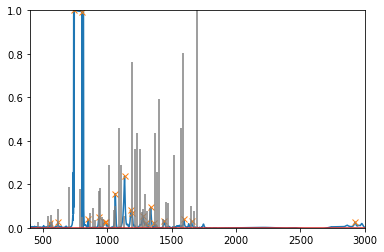

In [25]:
plt.plot(wavenumbers,heights)
plt.ylim(ymin=0,ymax=1)
plt.xlim(xmin=400,xmax=4000)
plt.plot(y,heights[peaks],"x")
#fig, ax = plt.subplots()
plt.stem(y_theo, heights_theo[peaks_theo],markerfmt=' ',linefmt='grey')
#plt.stem(y_theo,heights[peaks_theo] ,markerfmt=' ',linefmt='grey')
plt.ylim(ymin=0,ymax=1)
plt.xlim(xmin=400,xmax=3000)
plt.show()

In [43]:
#Calculate errors
print("Error calculation:")

#tolerance
tol=30.0

error=[]
j=0
#print(range(len(y)))
#print(range(len(y_theo)))
assigned=[]
for i in range(len(y)):
        print(i)
        while True:
            if y[i]-y_theo[j]>tol :
                print((y[i]-y_theo[j],y[i],y_theo[j]))
                print('error > ',tol,', skipping the predicted peak')
                j=j+1
            else:
                if y[i]>500 and y_theo[j]>500:
                    if abs(y[i]-y_theo[j])<abs(y[i]-y_theo[j+1]):
                        error.append(y[i]-y_theo[j])
                        assigned.append([y[i],y_theo[j]])
                    else:
                        j=j+1
                        error.append(y[i]-y_theo[j])
                        assigned.append([y[i],y_theo[j]])
#                print((y[i]-y_theo[j],y[i],y_theo[j]))
#                print(i,j)
                j=j+1
                break


print("\n Assigned peaks: \n")
print("   |Experimental | Scaled theoretical |  Theoretical unscaled  | cm-1")
k=0
for i in assigned:
    print(k," | ",i[0]," | ",i[1],"         | ", i[1]/SF," |")
    k=k+1

print("\n Mean absolute error: \n")
MAE=   sum(abs(i) for i in error)/len(peaks)
print("MAE = {} cm-1".format(round(MAE,2)))

#reverse order matching
print("\n NOW RIGHT TO LEFT \n")


error=[]
j=len(y_theo)
for i in reversed(range(len(y))):      
            while True:
                if y[i]-y_theo[j]<-50.0 :
 #           print('error > 50, skipping the predicted peak')
#            print(i,j,wavenumbers[i])
                    j=j-1
                else:
                    if y[i]>500 and y_theo[j]>500:
                        error.append(y[i]-y_theo[j])        
                    print((y[i]-y_theo[j],y[i],y_theo[j]))
                    print(i,j-1)
                    j=j-1
                    break
MAE=   sum(abs(i) for i in error)/len(peaks)
print("MAE={}".format(MAE))
    

Error calculation:
0
(229.05579999999998, 555.4258, 326.37)
error >  30.0 , skipping the predicted peak
(93.56279999999998, 555.4258, 461.863)
error >  30.0 , skipping the predicted peak
1
(43.56930000000011, 615.2113, 571.6419999999999)
error >  30.0 , skipping the predicted peak
2
(35.460300000000075, 738.6393, 703.179)
error >  30.0 , skipping the predicted peak
3
4
5
(45.30200000000002, 933.424, 888.122)
error >  30.0 , skipping the predicted peak
(30.466999999999985, 933.424, 902.957)
error >  30.0 , skipping the predicted peak
6
(34.25019999999995, 978.7452, 944.495)
error >  30.0 , skipping the predicted peak
7
8
9
(41.149999999999864, 1133.995, 1092.845)
error >  30.0 , skipping the predicted peak
10
11
12
(44.46399999999994, 1274.78, 1230.316)
error >  30.0 , skipping the predicted peak
13
14
15
16
(57.940000000000055, 1443.529, 1385.589)
error >  30.0 , skipping the predicted peak
(45.083000000000084, 1443.529, 1398.446)
error >  30.0 , skipping the predicted peak
17
(123.288

IndexError: list index out of range